## **ModelX - Dementia Prediction (XPredators)**

# Data Exploration and Flow

## Loading the Dataset

In [2]:
!pip install gdown
import gdown
import pandas as pd

file_id = "19mKGPNFb35kG__3Eihazyv5O69ZUxDcF"
url = f"https://drive.google.com/uc?id={file_id}"

gdown.download(url, "temp.csv", quiet=False)

df = pd.read_csv("temp.csv")
df.head()


Downloading...
From (original): https://drive.google.com/uc?id=19mKGPNFb35kG__3Eihazyv5O69ZUxDcF
From (redirected): https://drive.google.com/uc?id=19mKGPNFb35kG__3Eihazyv5O69ZUxDcF&confirm=t&uuid=2c718bd3-6c59-464f-ba3c-b465dcbe5ab8
To: /content/temp.csv
100%|██████████| 509M/509M [00:09<00:00, 52.0MB/s]
/tmp/ipython-input-2604187460.py:10: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,189,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,382,397,399,401,419,421,423,432,445,454,494,574,605,613,638,674,690,704,707,710,715,727,738,744,746,803,804,809,810,811,812,820,831,833,835,837,843,904,959,960,961,969,970,971,972,982,1004,1007,1010) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("temp.csv")


,NACCID,NACCADC,PACKET,FORMVER,VISITMO,VISITDAY,VISITYR,NACCVNUM,NACCAVST,NACCNVST,...,NPATGAM1,NPATGAM2,NPATGAM3,NPATGAM4,NPATGAM5,NPATGFRN,NPATGFR1,NPATGFR2,NPATGFR3,NPATGFR4
0,NACC002909,186,I,3.0,12,28,2022,1,2,2,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
1,NACC002909,186,F,3.0,1,23,2024,2,2,2,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
2,NACC003487,186,I,3.0,11,15,2023,1,1,1,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
3,NACC004352,186,I,3.0,10,5,2021,1,1,1,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
4,NACC004687,186,I,3.0,11,14,2022,1,1,1,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4


## Checking dtype counts of columns

In [3]:
df.dtypes.value_counts()

,count
int64,747
object,142
float64,135


In [4]:
object_columns = df.select_dtypes(include='object').columns.tolist()
print(object_columns)

['NACCID', 'PACKET', 'HISPORX', 'RACEX', 'RACESECX', 'RACETERX', 'PRIMLANX', 'INHISPOX', 'INRACEX', 'INRASECX', 'INRATERX', 'INRELTOX', 'NACCAMX', 'NACCAMSX', 'NACCFMX', 'NACCFMSX', 'NACCOMX', 'NACCOMSX', 'DRUG1', 'DRUG2', 'DRUG3', 'DRUG4', 'DRUG5', 'DRUG6', 'DRUG7', 'DRUG8', 'DRUG9', 'DRUG10', 'DRUG11', 'DRUG12', 'DRUG13', 'DRUG14', 'DRUG15', 'DRUG16', 'DRUG17', 'DRUG18', 'DRUG19', 'DRUG20', 'DRUG21', 'DRUG22', 'DRUG23', 'DRUG24', 'DRUG25', 'DRUG26', 'DRUG27', 'DRUG28', 'DRUG29', 'DRUG30', 'DRUG31', 'DRUG32', 'DRUG33', 'DRUG34', 'DRUG35', 'DRUG36', 'DRUG37', 'DRUG38', 'DRUG39', 'DRUG40', 'CVOTHRX', 'NCOTHRX', 'ARTHTYPX', 'OTHSLEEX', 'ABUSX', 'PSYCDISX', 'CVDIMAGX', 'SPEECHX', 'FACEXPX', 'TRESTFAX', 'TRESTRHX', 'TRESTLHX', 'TRESTRFX', 'TRESTLFX', 'TRACTRHX', 'TRACTLHX', 'RIGDNEX', 'RIGDUPRX', 'RIGDUPLX', 'RIGDLORX', 'RIGDLOLX', 'TAPSRTX', 'TAPSLFX', 'HANDMVRX', 'HANDMVLX', 'HANDATRX', 'HANDATLX', 'LEGRTX', 'LEGLFX', 'ARISINGX', 'POSTUREX', 'GAITX', 'POSSTABX', 'BRADYKIX', 'NPIQINFX', '

In [5]:
df['NACCUDSD'].value_counts()

,count
NACCUDSD,
1,94933
4,57590
3,34106
2,8567


1 = Normal cognition
2 = Impaired-not-MCI
3 = MCI
4 = Dementia

In [6]:
df['DEMENTED'].value_counts()

,count
DEMENTED,
0,137606
1,57590


## Dropping all the medical-related columns (Keep only non-medical variables)

In [7]:
medical_cols = [

    # --- A5: Subject Health History ---
    "THYROID","ARTHRIT","ARTHTYPE","ARTHTYPX","ARTHUPEX","ARTHLOEX","ARTHSPIN","ARTHUNK",
    "INCONTU","INCONTF","APNEA","RBD","INSOMN","OTHSLEEP","OTHSLEEX",
    "ALCOHOL","ABUSOTHR","ABUSX","PTSD","BIPOLAR","SCHIZ","DEP2YRS",
    "DEPOTHR","ANXIETY","OCD","NPSYDEV","PSYCDIS","PSYCDISX",
    "TOBAC30","TOBAC100","SMOKYRS","PACKSPER","QUITSMOK",
    "ALCOCCAS","ALCFREQ",
    "CVHATT","HATTMULT","HATTYEAR","CVAFIB","CVANGIO","CVBYPASS",
    "CVPACDEF","CVPACE","CVCHF","CVANGINA","CVHVALVE",
    "CVOTHR","CVOTHRX",
    "CBSTROKE","STROKMUL","NACCSTYR",
    "CBTIA","TIAMULT","NACCTIYR",
    "PD","PDYR","PDOTHR","PDOTHRYR",
    "SEIZURES",
    "TBI","TBIBRIEF","TRAUMBRF","TBIEXTEN","TRAUMEXT","TBIWOLOS","TRAUMCHR","TBIYEAR",
    "NCOTHR","NCOTHRX",
    "DIABETES","DIABTYPE",
    "HYPERTEN","HYPERCHO","B12DEF",

    # --- A4: Medications ---
    "ANYMEDS"
] + [f"DRUG{i}" for i in range(1, 41)] + [
    "NACCAPSY","NACCAANX","NACCADMD","NACCPDMD","NACCEMD","NACCEPMD",
    "NACCDBMD","NACCAMD","NACCAHTN","NACCHTNC","NACCACEI","NACCAAAS",
    "NACCBETA","NACCCCBS","NACCDIUR","NACCVASD","NACCANGI","NACCLIPL",
    "NACCNSD","NACCAC","NACCADEP",

    # --- D2: Clinician Medical Conditions ---
    "CANCER","CANCSITE","DIABET","MYOINF","CONGHRT","AFIBRILL",
    "HYPERT","ANGINA","HYPCHOL","VB12DEF","THYDIS","ARTH","ARTYPE",
    "ARTYPEX","ARTUPEX","ARTLOEX","ARTSPIN","ARTUNKN",
    "URINEINC","BOWLINC","SLEEPAP","REMDIS","HYPOSOM","SLEEPOTH","SLEEPOTX",
    "ANGIOCP","ANGIOPCI","PACEMAKE","HVALVE","ANTIENC",

    # --- Physical Exam (b1 section) ---
    "HEIGHT","WEIGHT","NACCBMI","BPSYS","BPDIAS","HRATE",
    "VISION","VISCORR","VISWCORR","HEARING","HEARAID","HEARWAID",

    # --- Blood Pressure Addendum (b1a) ---
    "BPSYSL","BPDIASL","BPSYSR","BPDIASR","BPDEVICE",

    # --- Parkinson’s UPDRS (b3) ---
    "PDNORMAL","SPEECH","SPEECHX","FACEXP","FACEXPX",
    "TRESTFAC","TRESTFAX","TRESTRHD","TRESTRHX","TRESTLHD","TRESTLHX",
    "TRESTRFT","TRESTRFX","TRESTLFT","TRESTLFX",
    "TRACTRHD","TRACTRHX","TRACTLHD","TRACTLHX",
    "RIGDNECK","RIGDNEX","RIGDUPRT","RIGDUPRX","RIGDUPLF","RIGDUPLX",
    "RIGDLORT","RIGDLORX","RIGDLOLF","RIGDLOLX",
    "TAPSRT","TAPSRTX","TAPSLF","TAPSLFX",
    "HANDMOVR","HANDMVRX","HANDMOVL","HANDMVLX",
    "HANDALTR","HANDATRX","HANDALTL","HANDATLX",
    "LEGRT","LEGRTX","LEGLF","LEGLFX",
    "ARISING","ARISINGX","POSTURE","POSTUREX",
    "GAIT","GAITX","POSSTAB","POSSTABX",
    "BRADYKIN","BRADYKIX",

    # --- Neurological Signs (b8 section) ---
    "NORMEXAM","FOCLDEF","GAITDIS","EYEMOVE","PARKSIGN",
    "RESTTRL","RESTTRR","SLOWINGL","SLOWINGR",
    "RIGIDL","RIGIDR","BRADY","PARKGAIT","POSTINST",
    "CVDSIGNS","CORTDEF","SIVDFIND","CVDMOTL","CVDMOTR",
    "CORTVISL","CORTVISR","SOMATL","SOMATR",
    "POSTCORT","PSPCBS","EYEPSP","DYSPSP","AXIALPSP","GAITPSP",
    "APRAXSP","APRAXL","APRAXR","CORTSENL","CORTSENR",
    "ATAXL","ATAXR","ALIENLML","ALIENLMR",
    "DYSTONL","DYSTONR","MYOCLLT","MYOCLRT",
    "ALSFIND","GAITNPH","OTHNEUR","OTHNEURX",
]

df = df.drop(columns=[col for col in medical_cols if col in df.columns])


In [8]:
df.shape

(195196, 745)

In [9]:
df.dtypes.value_counts()

,count
int64,620
object,65
float64,60


In [10]:
object_columns = df.select_dtypes(include='object').columns.tolist()
print(object_columns)

['NACCID', 'PACKET', 'HISPORX', 'RACEX', 'RACESECX', 'RACETERX', 'PRIMLANX', 'INHISPOX', 'INRACEX', 'INRASECX', 'INRATERX', 'INRELTOX', 'NACCAMX', 'NACCAMSX', 'NACCFMX', 'NACCFMSX', 'NACCOMX', 'NACCOMSX', 'CVDIMAGX', 'NPIQINFX', 'COGOTHRX', 'NACCCGFX', 'COGMODEX', 'BEOTHRX', 'NACCBEFX', 'BEMODEX', 'MOMODEX', 'MMSELANX', 'NPSYLANX', 'MOCALANX', 'RESPOTHX', 'OTHBIOMX', 'OTHMUTX', 'FTLDSUBX', 'OTHCOGX', 'OTHPSYX', 'COGOTHX', 'COGOTH2X', 'COGOTH3X', 'ANTIENCX', 'OTHCONDX', 'ADGCRND', 'ADGCEXR', 'NGDSGWAC', 'NGDSEXAC', 'NGDSWGAC', 'NGDSWEAC', 'NPFIXX', 'NPTANX', 'NPABANX', 'NPASANX', 'NPTDPANX', 'NPHISOX', 'NPPATHOX', 'NACCWRI1', 'NACCWRI2', 'NACCWRI3', 'NPFAUT1', 'NPFAUT2', 'NPFAUT3', 'NPFAUT4', 'NPFHSPEC', 'NPOTH1X', 'NPOTH2X', 'NPOTH3X']


In [15]:
len(object_columns)

65

## Removing all non-int data

In [16]:
import numpy as np

object_cols = df.select_dtypes(include=['object']).columns
df = df.drop(columns=object_cols)

df = df.select_dtypes(include=[np.number])



## Handling missing values and initilizing dependant and in-dependant features

In [17]:
if "DEMENTED" in df.columns:
    target = "DEMENTED"
else:
    target = "NACCUDSD"   # fallback multi-class clinical diagnosis

features = df.drop(columns=[target])
y = df[target]


X = features.fillna(features.median())

# ---------------------------------------
# 7. Final ML-ready data
# ---------------------------------------
print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (195196, 679)
Target shape: (195196,)


## Applying VarianceThreshold

In [18]:
from sklearn.feature_selection import VarianceThreshold
# Example: drop features with variance < 1
selector = VarianceThreshold(threshold=1)
X_reduced = selector.fit_transform(X)

# Keep only the selected columns
selected_cols = X.columns[selector.get_support()]
X_selected = X[selected_cols]

print("Remaining columns:", len(selected_cols))
print("Dropped columns:", len(X.columns) - len(selected_cols))


Remaining columns: 569
Dropped columns: 110


In [19]:
import pandas as pd

def drop_low_information_columns(df, threshold=0.8):
    cols_to_drop = []

    for col in df.columns:
        top_freq = df[col].value_counts(normalize=True, dropna=False).max()
        if top_freq >= threshold:
            cols_to_drop.append(col)

    print(f"Columns dropped ({len(cols_to_drop)}): {cols_to_drop}")
    return df.drop(columns=cols_to_drop)

# APPLY IT
X_selected = drop_low_information_columns(X, threshold=0.8)

print("Remaining columns:", X_selected.shape[1])


X_selected = drop_low_information_columns(X_selected)

Columns dropped (326): ['NACCCORE', 'HISPANIC', 'HISPOR', 'RACE', 'RACESEC', 'RACETER', 'PRIMLANG', 'RESIDENC', 'HANDED', 'INKNOWN', 'INRELY', 'NACCFADM', 'NACCFFTD', 'PERSCARE', 'DEL', 'DELSEV', 'HALL', 'HALLSEV', 'ELAT', 'ELATSEV', 'DISN', 'DISNSEV', 'MOT', 'MOTSEV', 'NOGDS', 'EMPTY', 'SPIRITS', 'WONDRFUL', 'WRTHLESS', 'HOPELESS', 'BETTER', 'B9CHG', 'COGVIS', 'COGOTHR', 'BEAPATHY', 'BEDEP', 'BEVHALL', 'BEAHALL', 'BEDEL', 'BEDISIN', 'BEIRRIT', 'BEAGIT', 'BEPERCH', 'BEOTHR', 'MOGAIT', 'MOFALLS', 'MOTREM', 'MOSLOW', 'NACCMOTF', 'MOMODE', 'MMSECOMP', 'MMSEVIS', 'MMSEHEAR', 'NPSYCLOC', 'NPSYLAN', 'LOGIMO', 'LOGIDAY', 'LOGIYR', 'LOGIPREV', 'MOCAREAS', 'MODCOMM', 'MOCBTOTS', 'NACCMOCB', 'REY1REC', 'REY1INT', 'REY2REC', 'REY2INT', 'REY3REC', 'REY3INT', 'REY4REC', 'REY4INT', 'REY5REC', 'REY5INT', 'REY6REC', 'REY6INT', 'OTRAILA', 'OTRLARR', 'OTRLALI', 'OTRAILB', 'OTRLBRR', 'OTRLBLI', 'REYDREC', 'REYDINT', 'REYTCOR', 'REYFPOS', 'VNTTOTW', 'VNTPCNC', 'RESPVAL', 'RESPHEAR', 'RESPDIST', 'RESPINTR'

## Removing Highly correlated and very low correlated features

In [29]:
import numpy as np

corr = X_selected.corr().abs()

# Upper triangle
upper_tri = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

to_drop = [col for col in upper_tri.columns if any(upper_tri[col] > 0.9)]

X_corr = X_selected.drop(columns=to_drop)

print("Dropped due to correlation:", len(to_drop))
print("Remaining:", X_corr.shape[1])

import numpy as np

correlations = X_corr.corrwith(y).abs()
low_corr_cols = correlations[correlations < 0.01].index

X_corr2 = X_corr.drop(columns=low_corr_cols)
print("Dropped low corr:", len(low_corr_cols))
print("Remaining:", X_corr2.shape[1])



Dropped due to correlation: 204
Remaining: 149
Dropped low corr: 5
Remaining: 144


## Approaching PCA technique

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected) # Scaling between 1 and 0

pca = PCA(n_components=30)
X_pca = pca.fit_transform(X_scaled)

loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)],
    index=X_selected.columns
)

top_PC1 = loadings["PC1"].abs().sort_values(ascending=False).head(10)
print("Top PC1 Features:\n", top_PC1)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Top PC1 Features:
 MSAIF       0.087526
DELIRIF     0.087525
HIVIF       0.087521
SCHIZOIF    0.087511
IMPSUBIF    0.087505
FTLDMOIF    0.087503
EPILEPIF    0.087493
PTSDDXIF    0.087485
BIPOLDIF    0.087466
ESSTREIF    0.087427
Name: PC1, dtype: float64
Explained Variance Ratio: [0.36061279 0.09582376 0.07389148 0.03709753 0.03381452 0.02889867
 0.0208967  0.01846978 0.01612167 0.01561101 0.01391761 0.0129972
 0.01099671 0.00979027 0.0079736  0.00784659 0.0069379  0.00682237
 0.00623964 0.0061662  0.00556157 0.00537907 0.00527868 0.00488248
 0.00475794 0.00449473 0.00436849 0.00417137 0.00408829 0.0039596 ]


In [29]:
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83
NACCADC,-0.005528,-0.013787,0.007177,-0.020302,-0.004052,0.029047,0.038872,-0.002827,-0.046719,-0.050586,...,0.028639,-0.024482,0.014175,-0.052709,0.007346,-0.016091,-0.024174,0.032490,0.032821,0.005858
FORMVER,0.064081,-0.001535,-0.020549,-0.022020,0.028351,0.057529,0.044883,0.046285,0.101100,0.037950,...,0.015790,-0.016704,-0.014067,0.017278,0.008827,-0.009036,0.012636,0.007665,0.011095,-0.028557
VISITMO,-0.000177,0.000234,0.001348,0.002027,-0.000656,-0.001315,0.000394,-0.001004,-0.005121,-0.005680,...,-0.000539,0.000134,-0.004009,0.007204,0.003650,-0.006888,-0.014789,0.004132,-0.013537,0.002080
VISITDAY,0.000022,-0.000615,0.000851,0.000341,-0.002102,-0.001049,-0.003099,-0.000998,-0.001833,0.003145,...,0.005433,-0.003897,0.003557,0.003290,0.002927,-0.001225,0.000001,0.002017,0.002994,-0.003481
VISITYR,0.062383,-0.004259,-0.019280,-0.021388,0.026006,0.036947,0.010152,0.042305,0.075873,0.028425,...,0.023875,-0.057306,0.007558,0.074054,0.067357,0.013461,-0.064464,0.025070,-0.022326,0.057054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NACCNCRD,-0.011354,-0.023826,-0.011285,-0.009639,0.039957,0.070361,0.111071,0.035265,-0.053543,-0.070682,...,-0.007720,-0.064732,-0.045087,0.025207,0.035760,0.062154,0.012577,-0.051144,-0.042026,-0.018416
NACCAPOE,0.000840,0.025834,0.017900,0.002324,-0.031235,-0.055566,-0.078921,-0.024905,0.047162,0.053352,...,-0.004238,-0.024386,-0.027354,-0.003484,0.004243,0.029068,0.008194,-0.017528,-0.020836,-0.001602
NACCNE4S,0.001034,0.027317,0.018946,0.002776,-0.032972,-0.058102,-0.083367,-0.026148,0.049302,0.056096,...,-0.001766,-0.022738,-0.022999,-0.004228,0.001696,0.030433,0.002004,-0.012498,-0.015224,-0.005135
NACCDAGE,0.020929,-0.063347,0.003365,0.021889,0.027627,-0.073429,-0.092079,0.093652,0.218619,-0.091823,...,0.005100,0.005650,-0.005484,0.005661,-0.009642,0.014564,-0.018429,0.002912,-0.048317,0.028448


# Model Training

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.4, random_state=42)


In [28]:
X_train

,NACCADC,FORMVER,VISITMO,VISITDAY,VISITYR,NACCVNUM,NACCAVST,NACCREAS,NACCREFR,BIRTHMO,...,NACCNOVS,NACCDSMO,NACCMDSS,NACCMRSA,NACCNMRI,ADGCGWAS,ADGCEXOM,NGDSGWAS,NACCNCRD,NACCAPOE
166296,8658,3.0,10,11,2023,19,19,1,8,9,...,0,88,1,0,0,0,0,0,1,1
2327,289,3.0,4,14,2022,1,1,7,2,1,...,0,88,3,0,0,0,0,0,0,1
104108,5452,2.0,4,11,2008,2,9,1,2,8,...,1,5,3,0,0,1,1,1,1,1
67869,3630,2.0,5,12,2014,3,4,1,1,8,...,1,10,3,0,0,1,0,0,1,2
159606,8646,2.0,7,11,2014,3,7,1,1,10,...,1,88,3,0,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,6061,2.0,9,22,2011,5,7,7,8,8,...,1,12,1,0,0,0,0,0,1,1
103694,5452,2.0,8,19,2014,1,7,1,2,6,...,0,88,3,0,0,0,0,0,1,1
131932,6499,3.0,5,3,2019,7,12,1,2,2,...,0,88,3,1,3,1,1,1,1,2
146867,8361,2.0,4,2,2010,4,5,1,8,7,...,1,88,1,0,0,0,0,0,0,2


## Logistic Regression

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# --- Scale the data properly ---
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)   # fit on train, transform train
X_test_scaled  = scaler.transform(X_test)        # ONLY transform test

# --- Train Logistic Regression ---
lr_model = LogisticRegression()
# lr_model.fit(X_train_scaled, y_train)
lr_model.fit(X_train, y_train)


# --- Predict ---
# lr_preds = lr_model.predict(X_test_scaled)
lr_preds = lr_model.predict(X_test)


# --- Evaluation ---
print(classification_report(y_test, lr_preds))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     55094
           1       0.98      0.98      0.98     22985

    accuracy                           0.99     78079
   macro avg       0.98      0.98      0.98     78079
weighted avg       0.99      0.99      0.99     78079



### LR - Model performance





In [33]:
confusion_matrix(y_test,lr_preds)

array([[54528,   566],
       [  548, 22437]])

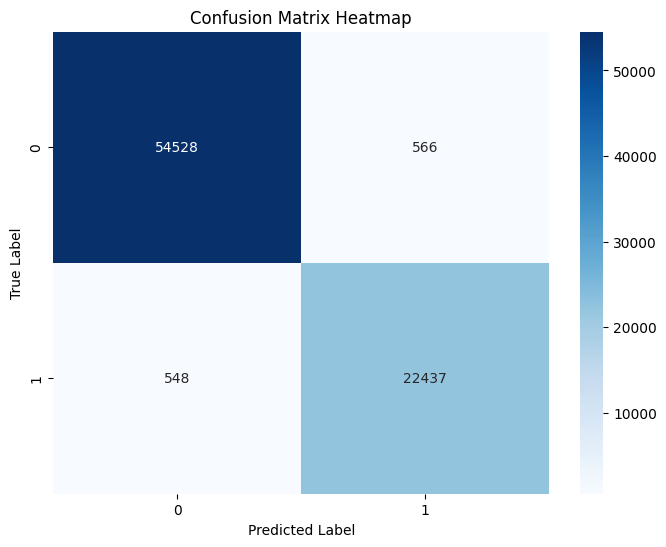

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 1. Calculate the Confusion Matrix
cm = confusion_matrix(y_test, lr_preds)

# 2. Plot the Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True, # Show the numbers in the cells
    fmt='d',    # Format as integers
    cmap='Blues',
    cbar=True   # Add a color bar
)

# Optional: Add labels if you know them
# plt.xticks(ticks=[0.5, 1.5], labels=['Negative', 'Positive'])
# plt.yticks(ticks=[0.5, 1.5], labels=['Negative', 'Positive'], rotation=0)

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix Heatmap')
plt.savefig('confusion_matrix_seaborn.png')

## RandomForest Model

In [34]:
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42
)

rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)



### Rf - Model Performance

In [35]:
print(classification_report(y_test, rf_preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     55094
           1       0.97      0.97      0.97     22985

    accuracy                           0.98     78079
   macro avg       0.98      0.98      0.98     78079
weighted avg       0.98      0.98      0.98     78079



In [36]:
confusion_matrix(y_test,rf_preds)

array([[54440,   654],
       [  607, 22378]])

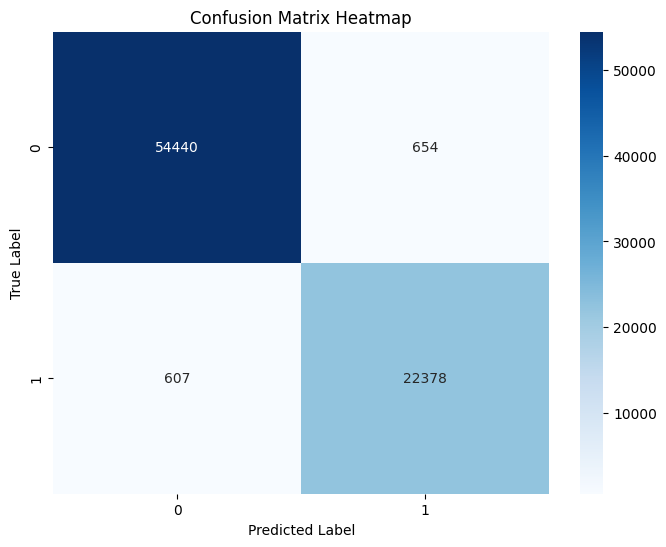

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 1. Calculate the Confusion Matrix
cm = confusion_matrix(y_test, rf_preds)

# 2. Plot the Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True, # Show the numbers in the cells
    fmt='d',    # Format as integers
    cmap='Blues',
    cbar=True   # Add a color bar
)

# Optional: Add labels if you know them
# plt.xticks(ticks=[0.5, 1.5], labels=['Negative', 'Positive'])
# plt.yticks(ticks=[0.5, 1.5], labels=['Negative', 'Positive'], rotation=0)

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix Heatmap')
plt.savefig('confusion_matrix_seaborn.png')

# Model Selection
Chose LogisticRegression Model due to more generelizaiton